In [ ]:
# ISA 530: Final Project
# Quantifying the Predictive Power of Biological vs. Environmental Features in Health Outcomes 
# Exploratory Data Analysis 
# Carly Carroll

### Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Structure

In [25]:
# display all columns 
pd.set_option('display.max_columns', None)

# paths to data
base_path = "/Users/carlycarroll/Desktop/MIDUS/Data"
wide_path  = f"{base_path}/MIDUS_twins_wide.csv"
long_path  = f"{base_path}/MIDUS_twins_long.csv"
diffs_path = f"{base_path}/MIDUS_twins_diffs.csv"

# load datasets
wide  = pd.read_csv(wide_path)
long  = pd.read_csv(long_path)
diffs = pd.read_csv(diffs_path)

# display first few rows
display(wide.head(10))
display(long.head(10))
display(diffs.head(10))

# display shapes
print("Shapes:")
print("Wide :", wide.shape)
print("Long :", long.shape)
print("Diffs:", diffs.shape)

,M2ID,M2FAMNUM_M1,SAMPLMAJ_M1,AGE_M1,SEX_M1,ZYGCAT_M1,EXERCISE_M1,HYPERTEN_M1,SMOKING_M1,ALCOHOL_M1,DEPRESS_M1,EDUC_M1,SRH_M1,ASTHMA_M1,DIABETES_M1,BMI_M1,HHINCOME_M1,MARITAL_M1,WAVE_M1,M2FAMNUM_M2,SAMPLMAJ_M2,AGE_M2,HYPERTEN_M2,SMOKING_M2,ALCOHOL_M2,DEPRESS_M2,EDUC_M2,SEX_M2,SRH_M2,ASTHMA_M2,DIABETES_M2,EXERCISE_M2,BMI_M2,HHINCOME_M2,MARITAL_M2,WAVE_M2,M2FAMNUM_M3,SAMPLMAJ_M3,AGE_M3,HYPERTEN_M3,SMOKING_M3,ALCOHOL_M3,DEPRESS_M3,EDUC_M3,HHINCOME_M3,SEX_M3,SRH_M3,ASTHMA_M3,DIABETES_M3,EXERCISE_M3,BMI_M3,MARITAL_M3,WAVE_M3
0,10005.0,120803.0,3.0,NaN,NaN,3.0,1.0,1.0,2.0,32.0,2.0,5.0,9.0,2.0,2.0,26.507816,2.0,NaN,M1,120803.0,3.0,2.0,1.0,NaN,35.0,2.0,3.0,NaN,8.0,2.0,2.0,2.0,NaN,0.0,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10006.0,120772.0,3.0,NaN,NaN,2.0,2.0,2.0,2.0,21.0,1.0,6.0,8.0,2.0,2.0,26.891987,2.0,NaN,M1,120772.0,3.0,3.0,1.0,2.0,15.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10007.0,120004.0,3.0,NaN,NaN,2.0,2.0,2.0,1.0,18.0,1.0,4.0,7.0,2.0,2.0,24.412549,2.0,NaN,M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10010.0,120378.0,3.0,NaN,NaN,3.0,2.0,2.0,1.0,18.0,1.0,3.0,6.0,2.0,2.0,23.056296,2.0,3.0,M1,120378.0,3.0,1.0,2.0,1.0,15.0,2.0,5.0,NaN,9.0,2.0,2.0,1.0,NaN,0.0,2.0,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10015.0,120805.0,3.0,NaN,NaN,1.0,2.0,2.0,1.0,19.0,1.0,5.0,7.0,2.0,2.0,31.601253,NaN,3.0,M1,120805.0,3.0,2.0,1.0,2.0,20.0,1.0,5.0,NaN,7.0,2.0,2.0,2.0,32.121429,0.0,3.0,M2,120805.0,3.0,3.0,1.0,2.0,20.0,1.0,5.0,NaN,NaN,6.0,2.0,2.0,2.0,35.900421,3.0,M3
5,10030.0,120243.0,3.0,NaN,NaN,1.0,2.0,2.0,2.0,24.0,2.0,8.0,8.0,2.0,2.0,25.584351,2.0,1.0,M1,120243.0,3.0,1.0,1.0,NaN,24.0,1.0,6.0,NaN,7.0,2.0,2.0,1.0,27.342055,0.0,1.0,M2,120243.0,3.0,2.0,1.0,NaN,25.0,2.0,8.0,25000.0,NaN,9.0,2.0,2.0,6.0,28.318557,1.0,M3
6,10036.0,120944.0,3.0,NaN,NaN,1.0,2.0,2.0,NaN,22.0,2.0,12.0,7.0,2.0,2.0,25.843152,2.0,3.0,M1,120944.0,3.0,1.0,2.0,NaN,24.0,2.0,12.0,NaN,10.0,2.0,2.0,1.0,31.229474,0.0,1.0,M2,120944.0,3.0,1.0,2.0,NaN,24.0,2.0,12.0,300000.0,NaN,8.0,2.0,2.0,2.0,29.535031,3.0,M3
7,10038.0,120049.0,3.0,NaN,NaN,3.0,2.0,2.0,2.0,22.0,1.0,5.0,8.0,2.0,2.0,29.760060,NaN,NaN,M1,120049.0,3.0,4.0,1.0,NaN,25.0,1.0,6.0,NaN,7.0,2.0,2.0,2.0,39.597545,0.0,3.0,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10046.0,120728.0,3.0,NaN,NaN,2.0,2.0,1.0,1.0,16.0,1.0,4.0,8.0,2.0,2.0,32.449911,2.0,1.0,M1,120728.0,3.0,4.0,1.0,NaN,16.0,2.0,6.0,NaN,5.0,2.0,1.0,2.0,32.281056,0.0,2.0,M2,120728.0,3.0,2.0,1.0,NaN,17.0,2.0,5.0,8000.0,NaN,8.0,2.0,1.0,1.0,33.480067,1.0,M3
9,10049.0,120883.0,3.0,NaN,NaN,1.0,2.0,2.0,NaN,17.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,M2ID,wave,M2FAMNUM,SAMPLMAJ,ZYGCAT,SRH,HYPERTEN,DIABETES,ASTHMA,DEPRESS,BMI,EDUC,HHINCOME,SMOKING,ALCOHOL,EXERCISE,MARITAL,AGE,SEX
0,10005.0,M1,120803.0,3.0,3.0,9.0,1.0,2.0,2.0,2.0,26.507816,5.0,2.0,2.0,32.0,1.0,NaN,NaN,NaN
1,10006.0,M1,120772.0,3.0,2.0,8.0,2.0,2.0,2.0,1.0,26.891987,6.0,2.0,2.0,21.0,2.0,NaN,NaN,NaN
2,10007.0,M1,120004.0,3.0,2.0,7.0,2.0,2.0,2.0,1.0,24.412549,4.0,2.0,1.0,18.0,2.0,NaN,NaN,NaN
3,10010.0,M1,120378.0,3.0,3.0,6.0,2.0,2.0,2.0,1.0,23.056296,3.0,2.0,1.0,18.0,2.0,3.0,NaN,NaN
4,10015.0,M1,120805.0,3.0,1.0,7.0,2.0,2.0,2.0,1.0,31.601253,5.0,NaN,1.0,19.0,2.0,3.0,NaN,NaN
5,10030.0,M1,120243.0,3.0,1.0,8.0,2.0,2.0,2.0,2.0,25.584351,8.0,2.0,2.0,24.0,2.0,1.0,NaN,NaN
6,10036.0,M1,120944.0,3.0,1.0,7.0,2.0,2.0,2.0,2.0,25.843152,12.0,2.0,NaN,22.0,2.0,3.0,NaN,NaN
7,10038.0,M1,120049.0,3.0,3.0,8.0,2.0,2.0,2.0,1.0,29.760060,5.0,NaN,2.0,22.0,2.0,NaN,NaN,NaN
8,10046.0,M1,120728.0,3.0,2.0,8.0,1.0,2.0,2.0,1.0,32.449911,4.0,2.0,1.0,16.0,2.0,1.0,NaN,NaN
9,10049.0,M1,120883.0,3.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,6.0,NaN,NaN,17.0,2.0,NaN,NaN,NaN


,M2FAMNUM,wave,d_BMI,d_DEPRESS,d_HYPERTEN,d_DIABETES,d_ASTHMA,d_EDUC,d_HHINCOME,d_SMOKING,d_ALCOHOL,d_EXERCISE,d_AGE,d_MARITAL_mismatch,d_SEX_mismatch,ZYGCAT
0,120002.0,M1,-6.799214,1.0,0.0,0.0,0.0,3.0,0.0,NaN,-18.0,0.0,NaN,1.0,NaN,3.0
1,120002.0,M2,-4.734714,1.0,1.0,1.0,1.0,3.0,0.0,NaN,-33.0,0.0,-1.0,1.0,NaN,NaN
2,120003.0,M1,7.966034,-1.0,1.0,0.0,0.0,-2.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,3.0
3,120003.0,M2,NaN,-1.0,0.0,0.0,0.0,-2.0,0.0,NaN,0.0,-3.0,2.0,1.0,NaN,NaN
4,120003.0,M3,12.781299,0.0,0.0,0.0,0.0,-2.0,20000.0,NaN,0.0,1.0,1.0,1.0,NaN,NaN
5,120004.0,M1,-2.116498,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,-4.0,0.0,NaN,NaN,NaN,2.0
6,120005.0,M1,-4.599420,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,-1.0,0.0,NaN,1.0,NaN,2.0
7,120005.0,M2,NaN,1.0,1.0,NaN,NaN,-3.0,NaN,0.0,-3.0,NaN,2.0,NaN,NaN,NaN
8,120006.0,M1,-4.304019,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0,NaN,1.0,NaN,1.0
9,120007.0,M1,-4.035132,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0


Shapes:
Wide : (1756, 53)
Long : (3548, 19)
Diffs: (1774, 16)


### Descriptive Statistics

In [26]:
# continuous variables
num_cols = [c for c in long.columns if long[c].dtype != "object" and c not in ["M2ID","M2FAMNUM"]]
print("\nNumeric summary (Long):")
display(long[num_cols].describe().T)

# categorical variables
cat_cols = [c for c in long.columns if long[c].dtype == "object" or c in ["SEX","MARITAL","SAMPLMAJ"]]
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    print(long[c].value_counts(dropna=False))


Numeric summary (Long):


,count,mean,std,min,25%,50%,75%,max
SAMPLMAJ,3548.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
ZYGCAT,1726.0,1.887601,0.834125,1.000000,1.000000,2.000000,3.000000,4.000000
SRH,3244.0,7.555487,1.540992,0.000000,7.000000,8.000000,9.000000,10.000000
HYPERTEN,3544.0,1.774831,0.420447,1.000000,2.000000,2.000000,2.000000,3.000000
DIABETES,3236.0,1.926761,0.260568,1.000000,2.000000,2.000000,2.000000,2.000000
ASTHMA,3234.0,1.892393,0.309931,1.000000,2.000000,2.000000,2.000000,2.000000
DEPRESS,3543.0,1.787750,0.435698,1.000000,2.000000,2.000000,2.000000,6.000000
BMI,3119.0,27.189850,5.493163,15.600919,23.336619,26.446928,29.870468,57.010834
EDUC,3541.0,6.907936,2.441287,1.000000,5.000000,6.000000,9.000000,12.000000
HHINCOME,2891.0,10554.092010,32165.928424,0.000000,0.000000,2.000000,12.000000,300000.000000



Value counts for wave:
M1    1726
M2    1172
M3     650
Name: wave, dtype: int64

Value counts for SAMPLMAJ:
3.0    3548
Name: SAMPLMAJ, dtype: int64

Value counts for MARITAL:
NaN    1008
2.0     979
1.0     921
3.0     407
4.0     165
5.0      68
Name: MARITAL, dtype: int64

Value counts for SEX:
NaN    3500
2.0      29
1.0      19
Name: SEX, dtype: int64


### Missing Values 

In [27]:
# wide dataset
print("Missing Data Summary: Wide Dataset")
print(f"Total rows: {wide.shape[0]}, Total columns: {wide.shape[1]}")
missing_wide = wide.isna().sum()
missing_wide = missing_wide[missing_wide > 0].sort_values(ascending=False)
print("\nColumns with missing values:\n")
print(missing_wide.to_string())
print("\nPercentage of missing values per column:\n")
print((missing_wide / len(wide) * 100).round(2).to_string())

# long dataset
print("\nMissing Data Summary: Long Dataset")
print(f"Total rows: {long.shape[0]}, Total columns: {long.shape[1]}")
missing_long = long.isna().sum()
missing_long = missing_long[missing_long > 0].sort_values(ascending=False)
print("\nColumns with missing values:\n")
print(missing_long.to_string())
print("\nPercentage of missing values per column:\n")
print((missing_long / len(long) * 100).round(2).to_string())

Missing Data Summary: Wide Dataset
Total rows: 1756, Total columns: 53

Columns with missing values:

SEX_M1         1756
AGE_M1         1756
SEX_M3         1738
SEX_M2         1726
SMOKING_M3     1516
MARITAL_M3     1317
SMOKING_M2     1254
HHINCOME_M3    1189
BMI_M3         1180
DIABETES_M3    1170
ASTHMA_M3      1170
EXERCISE_M3    1168
SRH_M3         1162
ALCOHOL_M3     1158
HYPERTEN_M3    1107
EDUC_M3        1106
DEPRESS_M3     1106
AGE_M3         1106
SAMPLMAJ_M3    1106
M2FAMNUM_M3    1106
WAVE_M3        1106
HHINCOME_M2     929
MARITAL_M2      917
EXERCISE_M2     787
BMI_M2          745
ALCOHOL_M2      705
SRH_M2          700
ASTHMA_M2       698
DIABETES_M2     698
EDUC_M2         587
HYPERTEN_M2     585
WAVE_M2         584
AGE_M2          584
SAMPLMAJ_M2     584
M2FAMNUM_M2     584
DEPRESS_M2      584
MARITAL_M1      494
SMOKING_M1      460
HHINCOME_M1     259
BMI_M1          224
ALCOHOL_M1      181
ASTHMA_M1       166
DIABETES_M1     164
SRH_M1          162
EXERCISE_M1      3

### Outlier Detection

In [28]:
# function to detect outliers using IQR
def detect_outliers_iqr(df, numeric_cols):
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        print(f"{col}: {len(outliers)} outliers ({round(len(outliers)/len(df)*100,2)}%)")

# numeric columns to check
numeric_cols = ['BMI', 'DEPRESS', 'HHINCOME', 'AGE', 'ALCOHOL', 'EXERCISE']

# run for wide dataset
print("Wide Dataset")
detect_outliers_iqr(wide, [c for c in wide.columns if any(n in c for n in numeric_cols)])

# run for long dataset
print("\nLong Dataset")
detect_outliers_iqr(long, numeric_cols)


Wide Dataset
AGE_M1: 0 outliers (0.0%)
EXERCISE_M1: 70 outliers (3.99%)
ALCOHOL_M1: 112 outliers (6.38%)
DEPRESS_M1: 420 outliers (23.92%)
BMI_M1: 51 outliers (2.9%)
HHINCOME_M1: 227 outliers (12.93%)
AGE_M2: 6 outliers (0.34%)
ALCOHOL_M2: 75 outliers (4.27%)
DEPRESS_M2: 239 outliers (13.61%)
EXERCISE_M2: 35 outliers (1.99%)
BMI_M2: 30 outliers (1.71%)
HHINCOME_M2: 63 outliers (3.59%)
AGE_M3: 6 outliers (0.34%)
ALCOHOL_M3: 19 outliers (1.08%)
DEPRESS_M3: 113 outliers (6.44%)
HHINCOME_M3: 34 outliers (1.94%)
EXERCISE_M3: 66 outliers (3.76%)
BMI_M3: 15 outliers (0.85%)

Long Dataset
BMI: 90 outliers (2.54%)
DEPRESS: 772 outliers (21.76%)
HHINCOME: 605 outliers (17.05%)
AGE: 6 outliers (0.17%)
ALCOHOL: 236 outliers (6.65%)
EXERCISE: 1026 outliers (28.92%)


### Distribution Plots

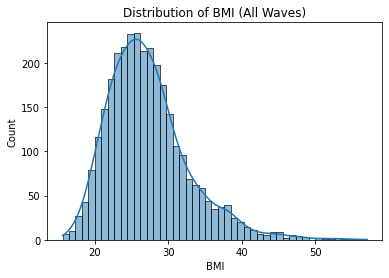

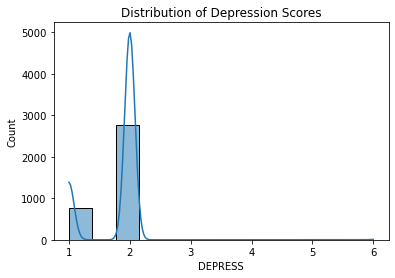

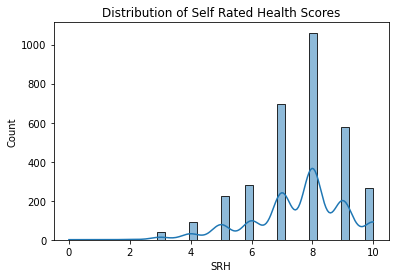

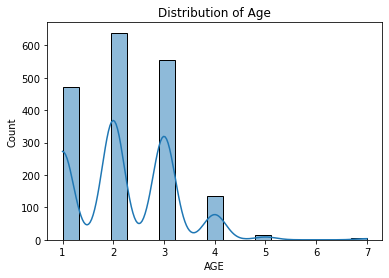

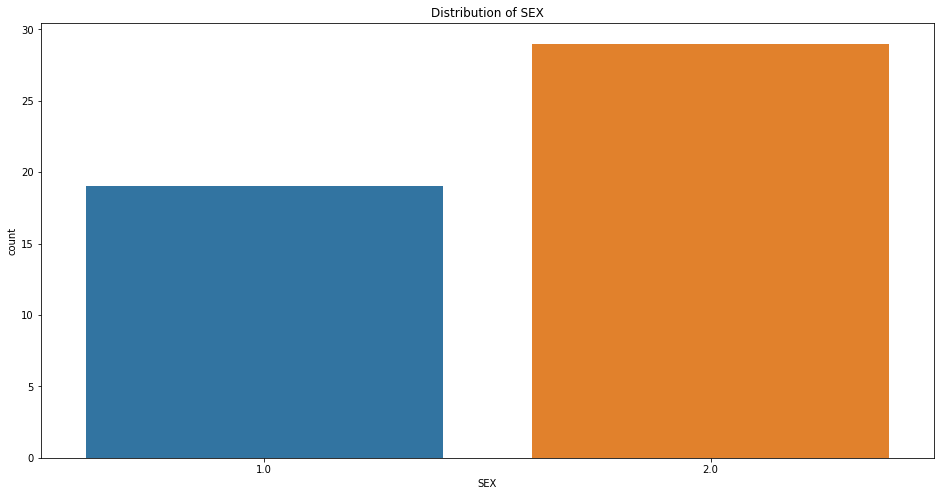

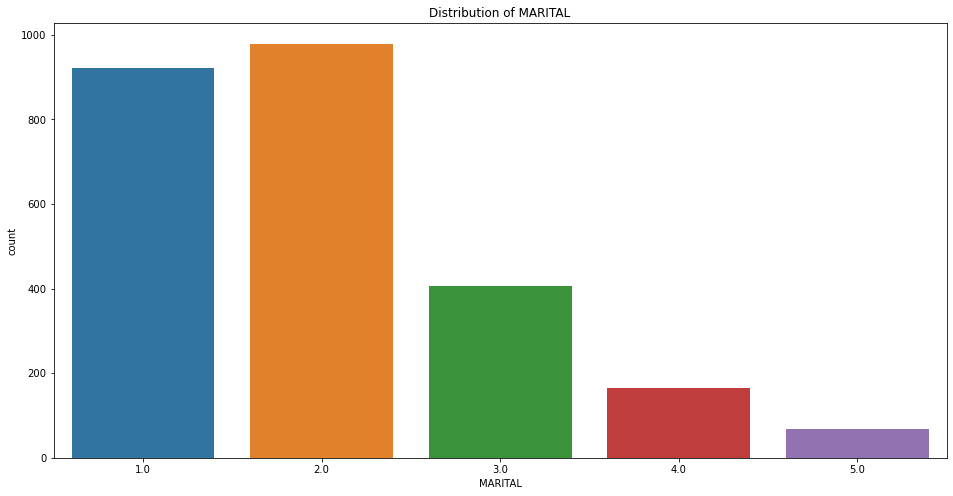

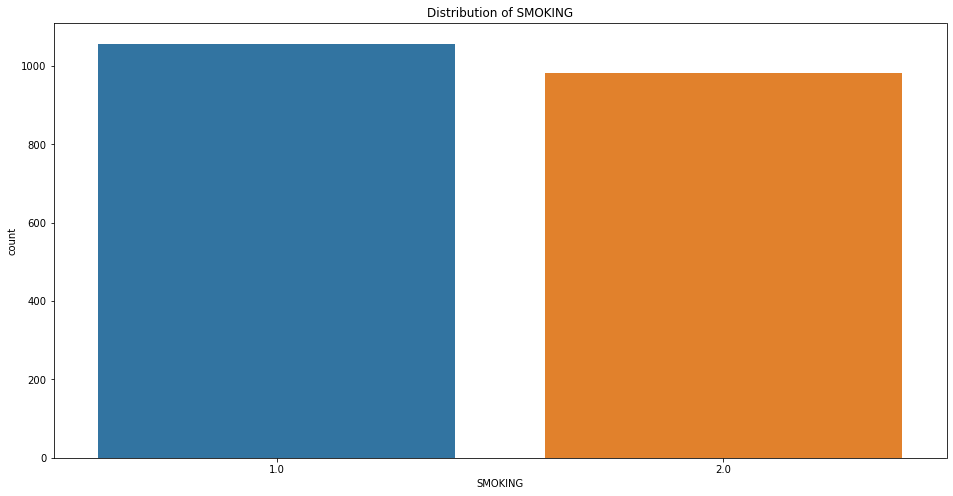

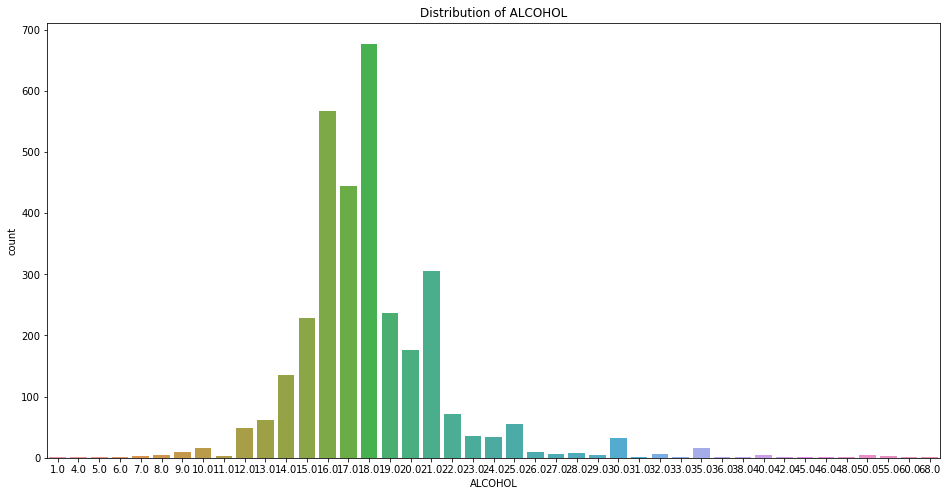

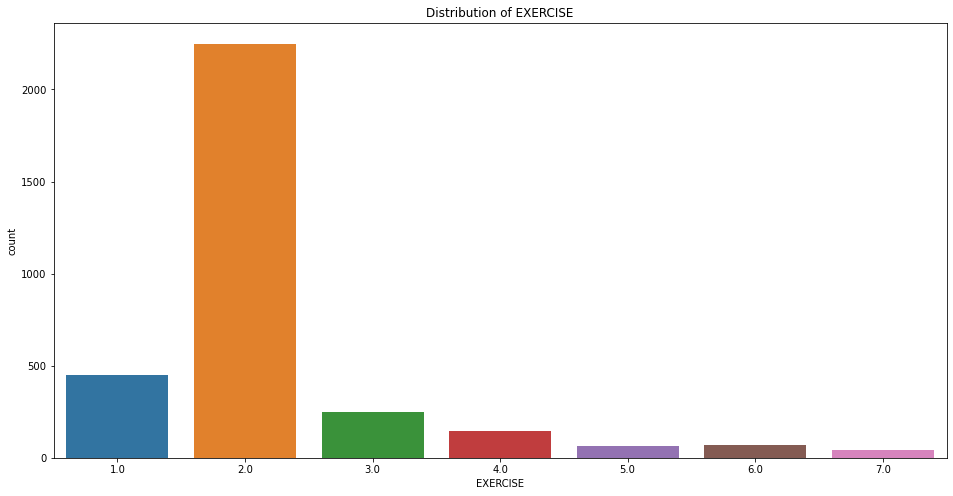

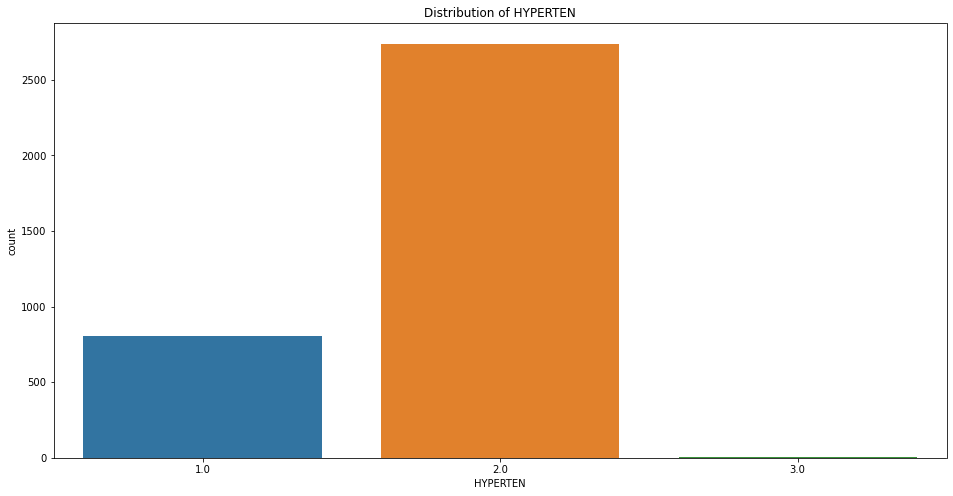

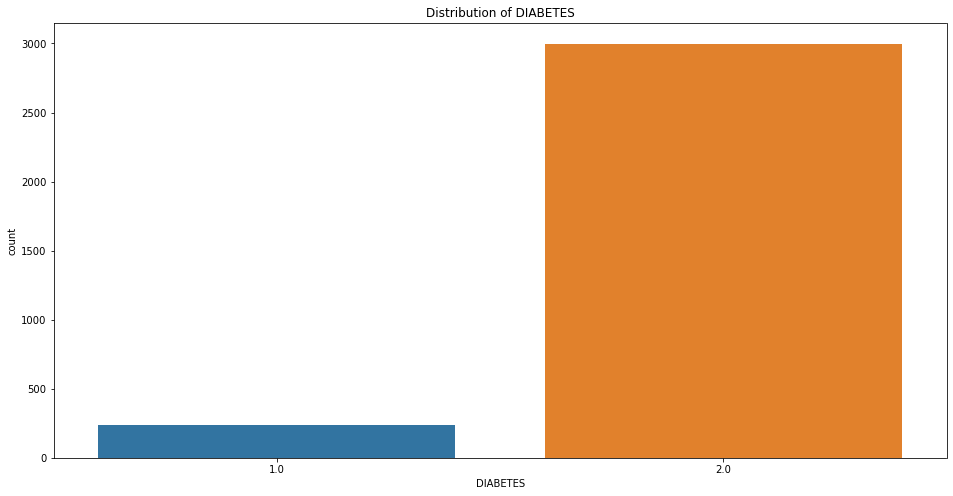

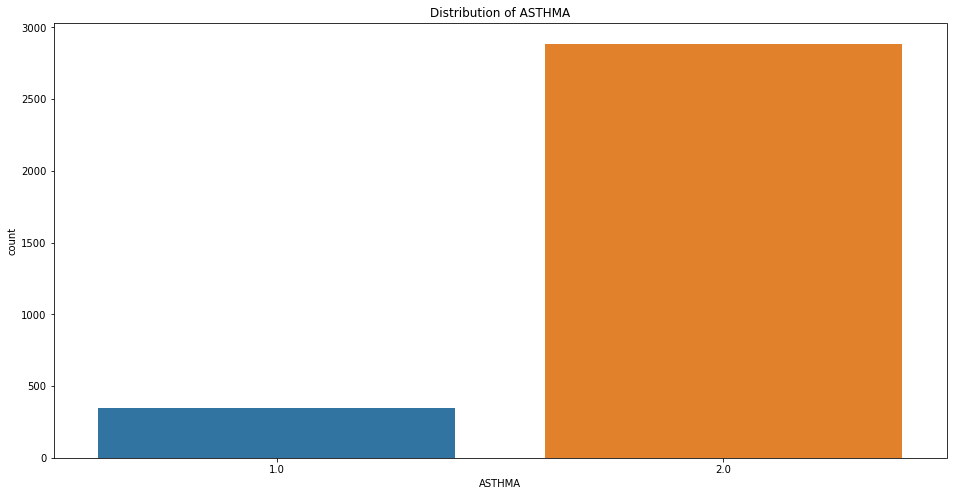

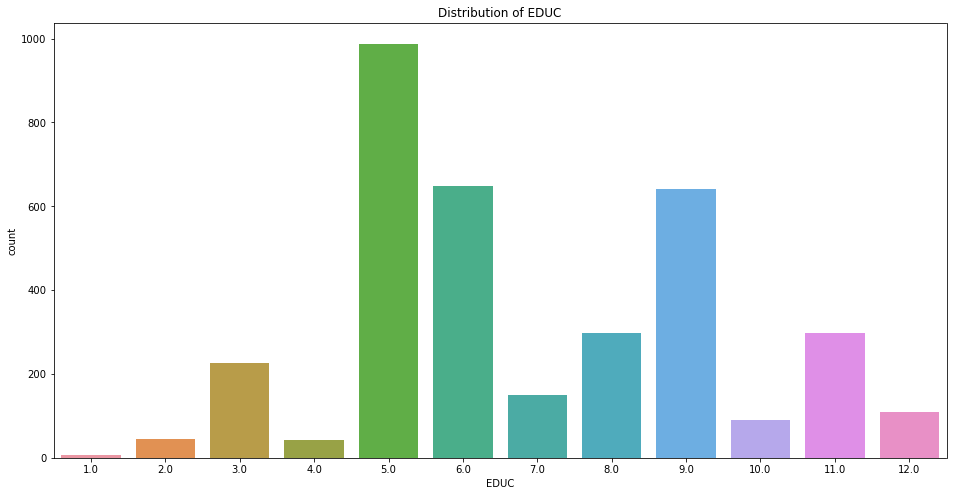

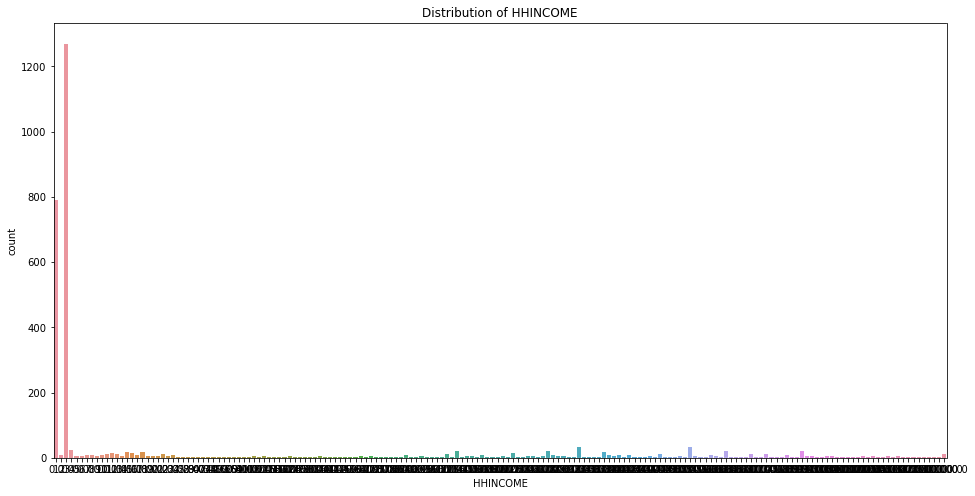

In [29]:
# BMI
sns.histplot(long['BMI'].dropna(), kde = True)
plt.title("Distribution of BMI (All Waves)")
plt.show()

# depression
sns.histplot(long['DEPRESS'].dropna(), kde = True)
plt.title("Distribution of Depression Scores")
plt.show()

# self rated health
sns.histplot(long['SRH'].dropna(), kde = True)
plt.title("Distribution of Self Rated Health Scores")
plt.show()

# age
sns.histplot(long['AGE'].dropna(), kde = True)
plt.title("Distribution of Age")
plt.show()

# categorical variables
for c in ["SEX","MARITAL","SMOKING","ALCOHOL","EXERCISE","HYPERTEN","DIABETES","ASTHMA", "EDUC", "HHINCOME"]:
    plt.figure(figsize = (16,8))
    sns.countplot(x = c, data = long)
    plt.title(f"Distribution of {c}")
    plt.show()

### Pair Level Analysis

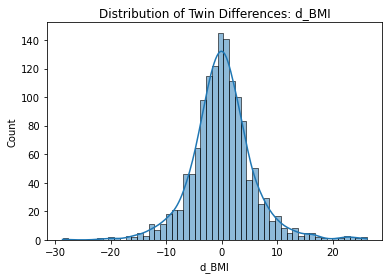

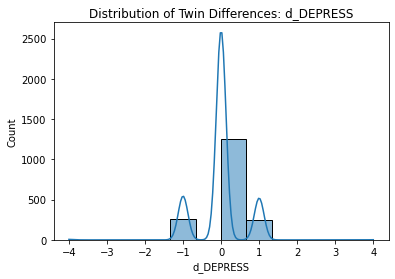

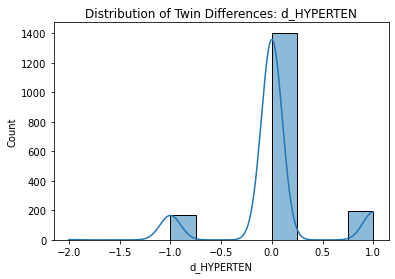

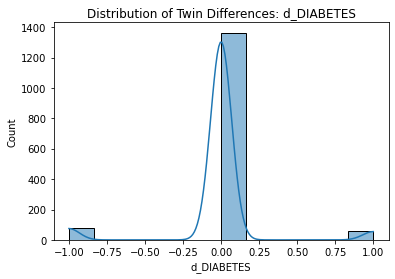

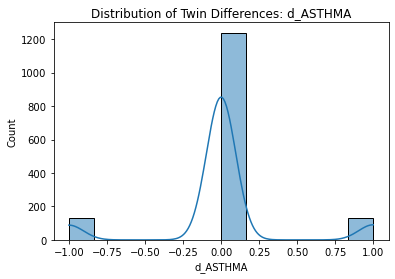

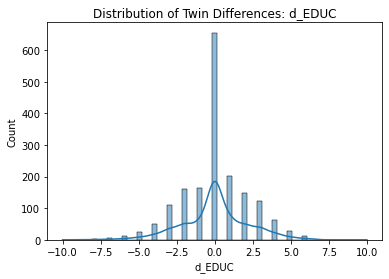

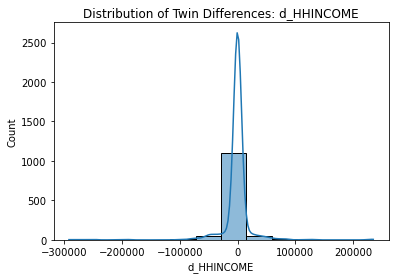

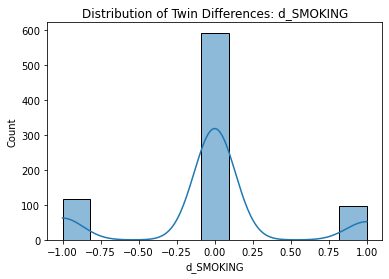

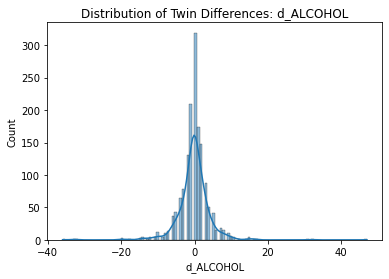

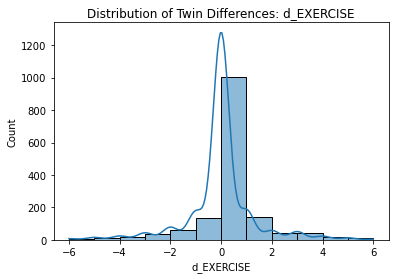

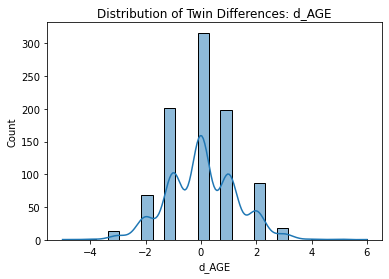

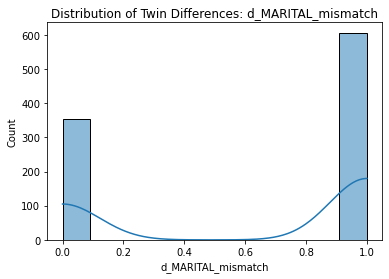

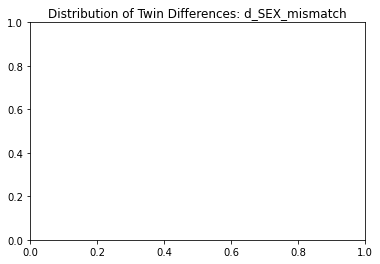

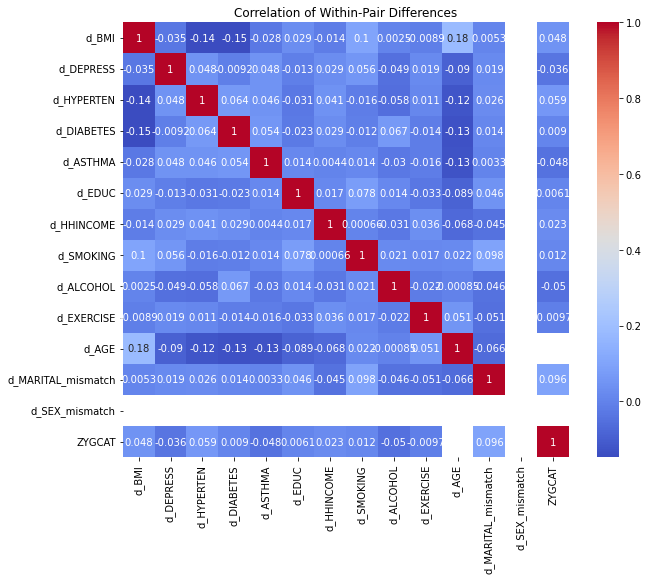

In [30]:
# distribution of within pair differences
for c in [col for col in diffs.columns if col.startswith("d_")]:
    plt.figure(figsize = (6,4))
    sns.histplot(diffs[c].dropna(), kde = True)
    plt.title(f"Distribution of Twin Differences: {c}")
    plt.show()

# Correlation heatmap of differences
plt.figure(figsize = (10,8))
sns.heatmap(diffs.drop(columns=["M2FAMNUM","wave"]).corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation of Within-Pair Differences")
plt.show()


### Wave Comparisons 

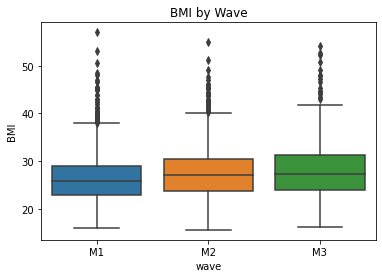

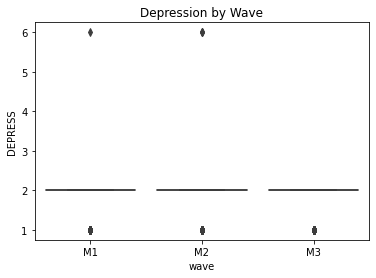

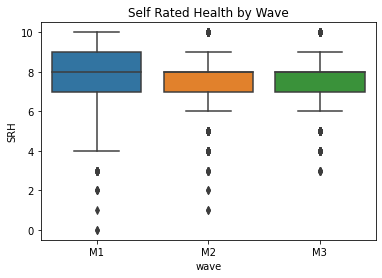

In [31]:
# Average BMI by wave
sns.boxplot(x="wave", y="BMI", data=long)
plt.title("BMI by Wave")
plt.show()

# average depression by wave
sns.boxplot(x="wave", y="DEPRESS", data=long)
plt.title("Depression by Wave")
plt.show()

# average self rated health by wave
sns.boxplot(x="wave", y="SRH", data=long)
plt.title("Self Rated Health by Wave")
plt.show()